### Exploratory Data Analysis (EDA)  
**Цель**  
Провести разведочный анализ данных для понимания структуры dataset, распределения признаков, выявления проблем данных и формирования гипотез для feature engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Загрузка данных
df = pd.read_csv('creditcard.csv')

print("Размер dataset:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размер dataset: (284807, 31)

Первые 5 строк:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Базовая информация о данных
print("Информация о структуре данных:")
print("=" * 50)
df.info()

Информация о структуре данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 no

In [4]:
# Проверка на пропущенные значения
print("\nПроверка пропущенных значений:")
print("=" * 40)
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "Пропущенные значения отсутствуют")


Проверка пропущенных значений:
Пропущенные значения отсутствуют


In [5]:
# Распределение классов
class_distribution = df['Class'].value_counts()
class_percentage = df['Class'].value_counts(normalize=True) * 100

print("Распределение целевой переменной (Class):")
print("=" * 50)
for class_val, count, percentage in zip(class_distribution.index, class_distribution.values, class_percentage.values):
    print(f"Класс {class_val}: {count:>6} наблюдений ({percentage:>6.3f}%)")

print(f"\nДисбаланс классов: {class_distribution[0]/class_distribution[1]:.1f}:1")

Распределение целевой переменной (Class):
Класс 0: 284315 наблюдений (99.827%)
Класс 1:    492 наблюдений ( 0.173%)

Дисбаланс классов: 577.9:1


In [6]:
# Распределение классов
class_distribution = df['Class'].value_counts()
class_percentage = df['Class'].value_counts(normalize=True) * 100

print("Распределение целевой переменной (Class):")
print("=" * 50)
for class_val, count, percentage in zip(class_distribution.index, class_distribution.values, class_percentage.values):
    print(f"Класс {class_val}: {count:>6} наблюдений ({percentage:>6.3f}%)")

print(f"\nДисбаланс классов: {class_distribution[0]/class_distribution[1]:.1f}:1")

Распределение целевой переменной (Class):
Класс 0: 284315 наблюдений (99.827%)
Класс 1:    492 наблюдений ( 0.173%)

Дисбаланс классов: 577.9:1


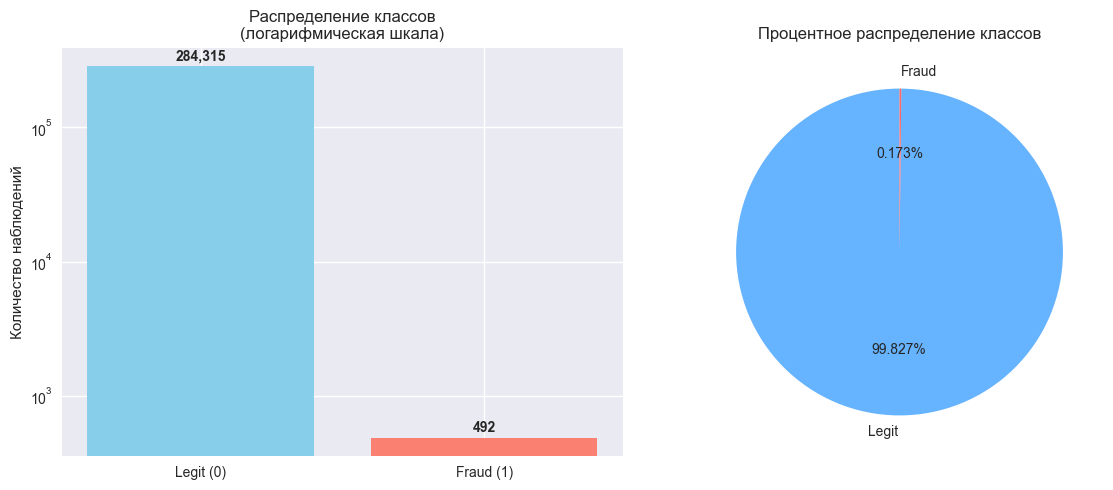

In [7]:
# Визуализация распределения классов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Столбчатая диаграмма
ax1.bar(['Legit (0)', 'Fraud (1)'], class_distribution.values, color=['skyblue', 'salmon'])
ax1.set_title('Распределение классов\n(логарифмическая шкала)')
ax1.set_yscale('log')
ax1.set_ylabel('Количество наблюдений')

for i, v in enumerate(class_distribution.values):
    ax1.text(i, v * 1.1, f'{v:,}', ha='center', fontweight='bold')

# Круговая диаграмма
colors = ['#66b3ff', '#ff6666']
ax2.pie(class_distribution.values, labels=['Legit', 'Fraud'], autopct='%1.3f%%', 
        colors=colors, startangle=90)
ax2.set_title('Процентное распределение классов')

plt.tight_layout()
plt.show()

In [9]:
# Описательная статистика для всех признаков
print("Описательная статистика числовых признаков:")
print("=" * 60)
print(df.describe())

Описательная статистика числовых признаков:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15  

In [10]:
# Детальный анализ признаков Time и Amount
print("\nДетальный анализ Time и Amount:")
print("=" * 40)
time_amount_stats = df[['Time', 'Amount']].describe()
print(time_amount_stats)


Детальный анализ Time и Amount:
                Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000


In [11]:
# Анализ PCA признаков
pca_columns = [f'V{i}' for i in range(1, 29)]
pca_stats = df[pca_columns].describe().T[['mean', 'std', 'min', 'max']]

print("\nСтатистики PCA признаков (стандартизированы):")
print("=" * 50)
print(f"Среднее значение mean: {pca_stats['mean'].abs().mean():.6f}")
print(f"Стандартное отклонение std: {pca_stats['std'].mean():.6f}")
print(f"\nДиапазон min-max: [{pca_stats['min'].min():.3f}, {pca_stats['max'].max():.3f}]")


Статистики PCA признаков (стандартизированы):
Среднее значение mean: 0.000000
Стандартное отклонение std: 0.976391

Диапазон min-max: [-113.743, 120.589]


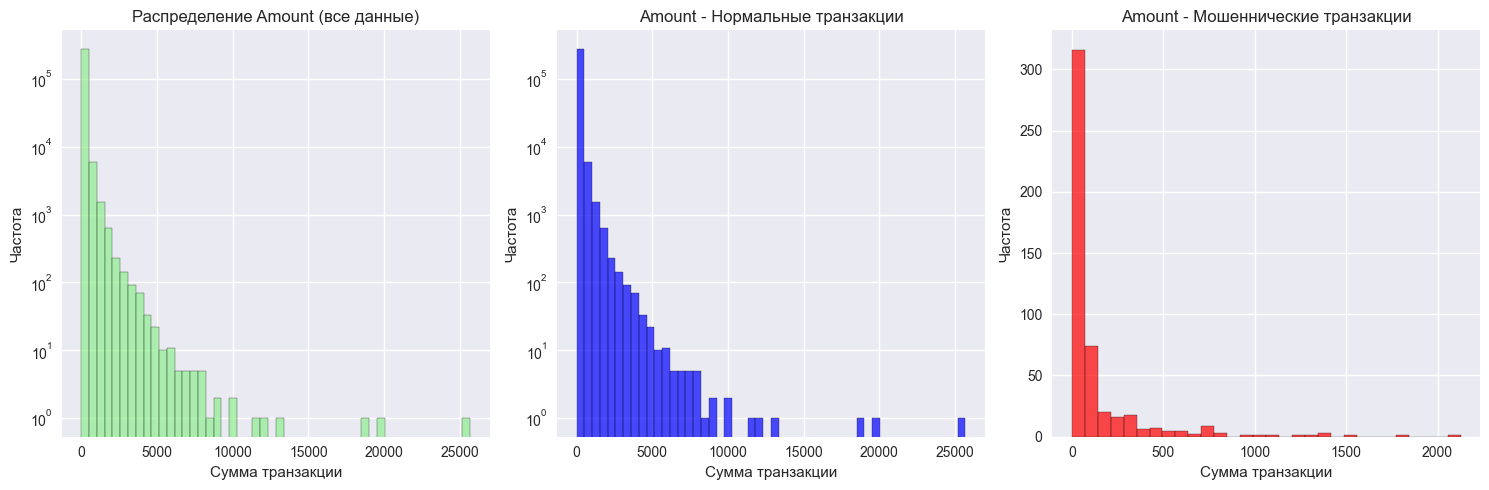

In [12]:
# Распределение Amount по классам
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Amount'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Распределение Amount (все данные)')
plt.xlabel('Сумма транзакции')
plt.ylabel('Частота')
plt.yscale('log')

plt.subplot(1, 3, 2)
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Amount - Нормальные транзакции')
plt.xlabel('Сумма транзакции')
plt.ylabel('Частота')
plt.yscale('log')

plt.subplot(1, 3, 3)
plt.hist(df[df['Class'] == 1]['Amount'], bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title('Amount - Мошеннические транзакции')
plt.xlabel('Сумма транзакции')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

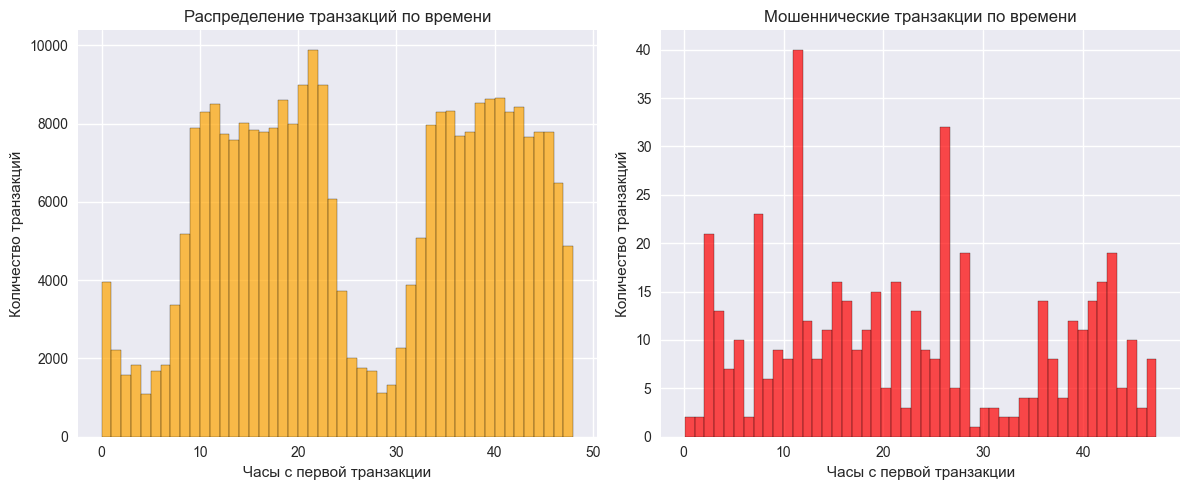

In [13]:
# Анализ времени транзакций
df['Hour'] = df['Time'] / 3600  # Преобразование в часы

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Hour'], bins=48, color='orange', alpha=0.7, edgecolor='black')
plt.title('Распределение транзакций по времени')
plt.xlabel('Часы с первой транзакции')
plt.ylabel('Количество транзакций')

plt.subplot(1, 2, 2)
fraud_hours = df[df['Class'] == 1]['Hour']
plt.hist(fraud_hours, bins=48, color='red', alpha=0.7, edgecolor='black')
plt.title('Мошеннические транзакции по времени')
plt.xlabel('Часы с первой транзакции')
plt.ylabel('Количество транзакций')

plt.tight_layout()
plt.show()

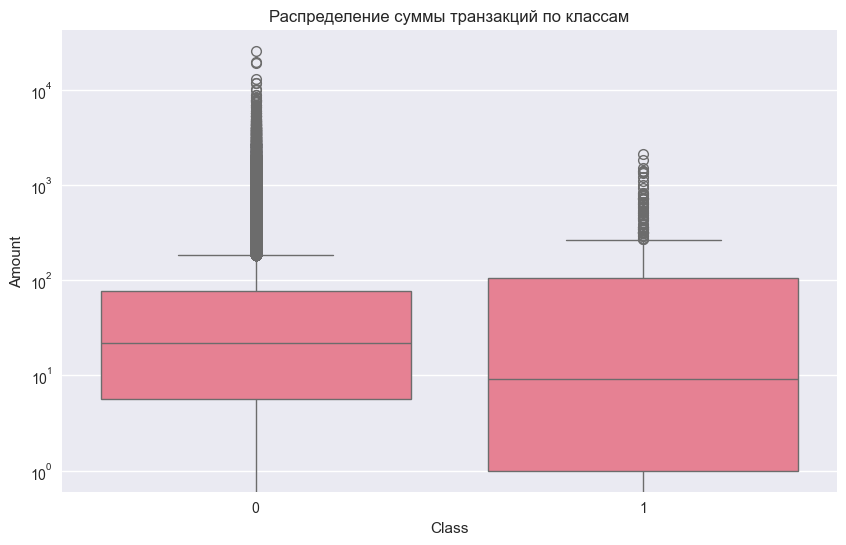

In [14]:
# Выбросы в сумме транзакций по классам
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Распределение суммы транзакций по классам')
plt.yscale('log')
plt.show()

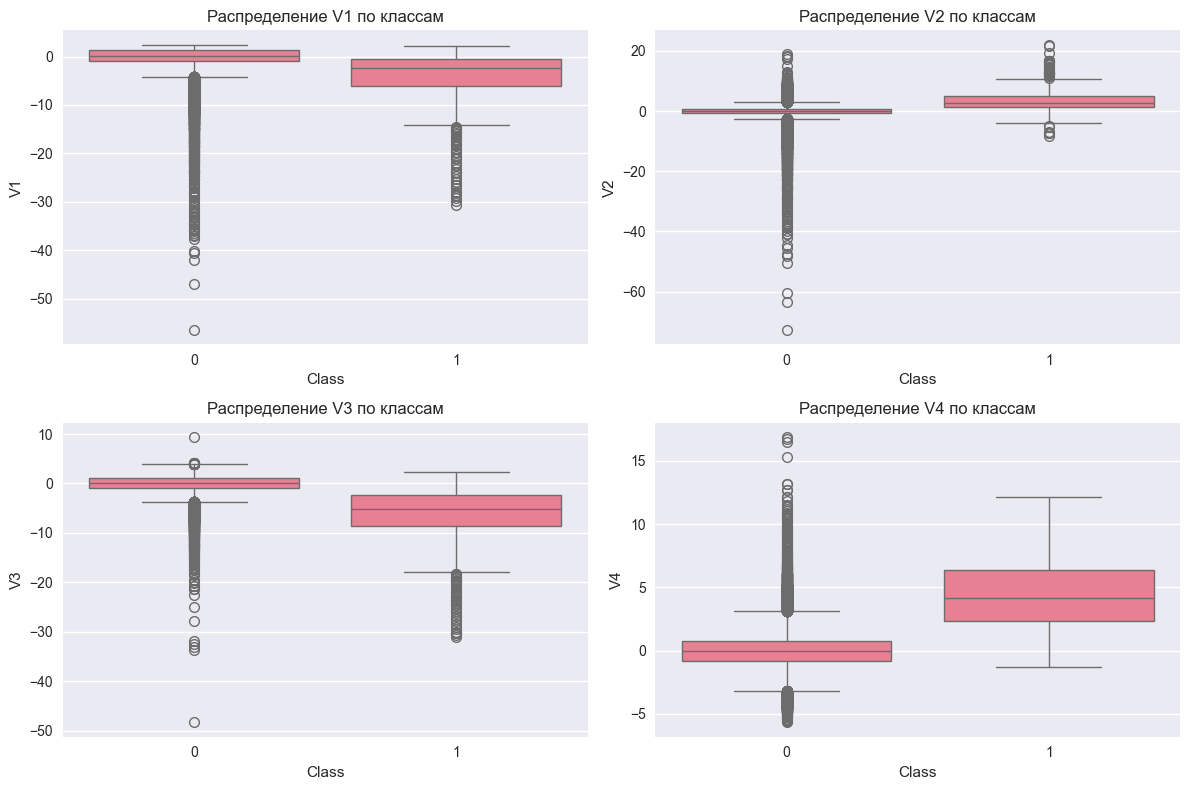

In [15]:
# Анализ выбросов в PCA признаках
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
pca_features_to_check = ['V1', 'V2', 'V3', 'V4']

for i, feature in enumerate(pca_features_to_check):
    row, col = i // 2, i % 2
    sns.boxplot(x='Class', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Распределение {feature} по классам')

plt.tight_layout()
plt.show()

Можем наблюдать, что выбросы, в общем-то, есть в каждом из признаков, однако, насколько их удаление эффективно, выясним в другой части

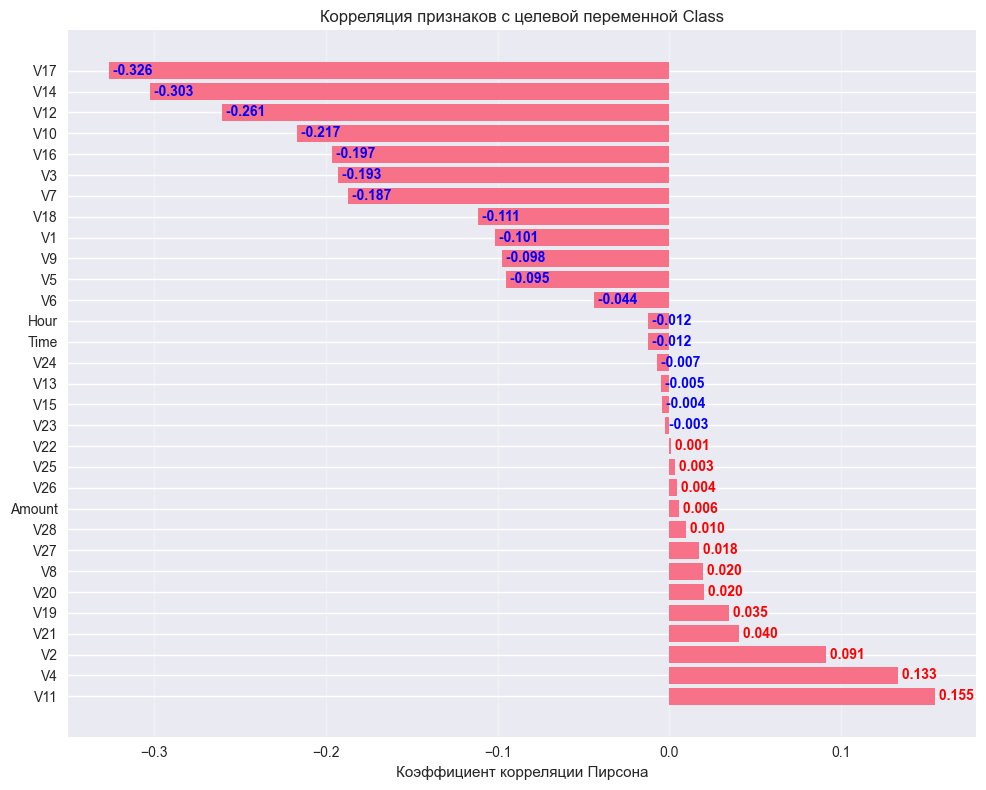

In [16]:
# Корреляция признаков с целевой переменной
corr_with_target = df.corr()['Class'].drop('Class').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(corr_with_target)), corr_with_target.values)
plt.yticks(range(len(corr_with_target)), corr_with_target.index)
plt.title('Корреляция признаков с целевой переменной Class')
plt.xlabel('Коэффициент корреляции Пирсона')
plt.grid(axis='x', alpha=0.3)

# Добавляем значения на бары
for i, (bar, value) in enumerate(zip(bars, corr_with_target.values)):
    color = 'red' if value > 0 else 'blue'
    plt.text(value, i, f' {value:.3f}', va='center', color=color, fontweight='bold')

plt.tight_layout()
plt.show()

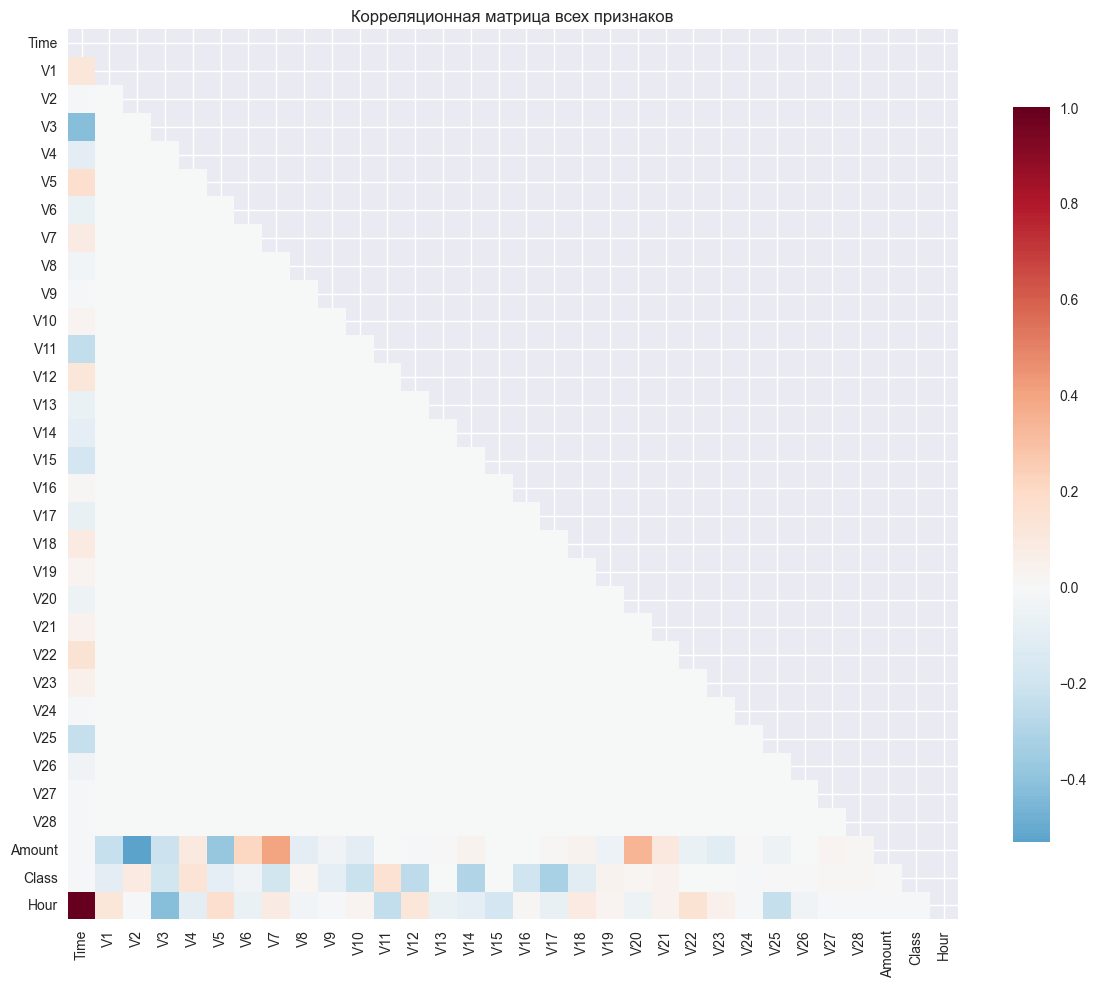

In [17]:
# Тепловая карта корреляций
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()

# Маска для верхнего треугольника
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask,
            cmap='RdBu_r',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title('Корреляционная матрица всех признаков')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

корреляционный анализ проводится для того, чтобы увидеть слабо значимые для целевой переменной признаки, чтобы в дальнейшем, опираясь в том числе на результаты данного анализа, принять решение об удалении ненужных признаков

In [18]:
# Топ коррелирующих признаков с Class
print("Топ-10 признаков по корреляции с Class:")
print("=" * 50)
top_correlations = corr_with_target.head(10)
for feature, corr in top_correlations.items():
    direction = "положительная" if corr > 0 else "отрицательная"
    print(f"{feature:>4}: {corr:7.4f} ({direction})")

Топ-10 признаков по корреляции с Class:
 V11:  0.1549 (положительная)
  V4:  0.1334 (положительная)
  V2:  0.0913 (положительная)
 V21:  0.0404 (положительная)
 V19:  0.0348 (положительная)
 V20:  0.0201 (положительная)
  V8:  0.0199 (положительная)
 V27:  0.0176 (положительная)
 V28:  0.0095 (положительная)
Amount:  0.0056 (положительная)


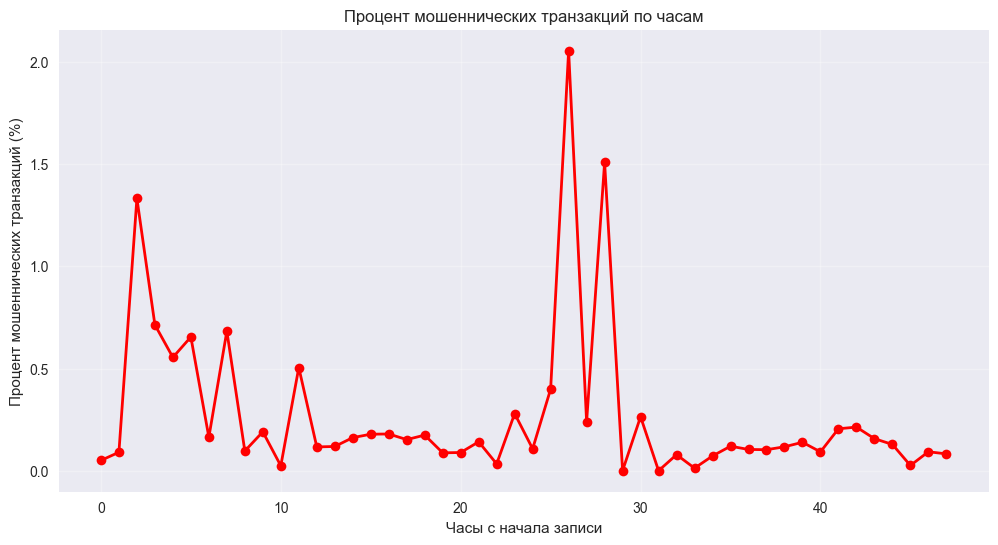

In [19]:
# Анализ распределения мошеннических операций по времени
df['Hour_Group'] = (df['Time'] // 3600).astype(int)
fraud_by_hour = df.groupby('Hour_Group')['Class'].mean() * 100

plt.figure(figsize=(12, 6))
fraud_by_hour.plot(kind='line', color='red', marker='o', linewidth=2)
plt.title('Процент мошеннических транзакций по часам')
plt.xlabel('Часы с начала записи')
plt.ylabel('Процент мошеннических транзакций (%)')
plt.grid(True, alpha=0.3)
plt.show()

t-тест проводится для того, чтобы увидеть потенциально незначимые признаки, чтобы в дальнейшем, опираясь в том числе на результаты данного теста, принять решение об удалении ненужных признаков

In [20]:
# T-тесты для сравнения распределений по классам
features = df.drop('Class', axis=1).columns.tolist()
results = []

print("Результаты T-тестов для признаков:")
print("=" * 70)
print(f"{'Признак':<10} {'t-статистика':<12} {'p-value':<12} {'Значимость'}")
print("-" * 70)

for feature in features:
    normal = df[df['Class'] == 0][feature]
    fraud = df[df['Class'] == 1][feature]
    
    t_stat, p_value = stats.ttest_ind(normal, fraud, equal_var=False)
    significant = p_value < 0.05
    
    results.append({
        'feature': feature, 
        't_stat': t_stat, 
        'p_value': p_value, 
        'significant': significant
    })
    
    sig_mark = "***" if significant else ""
    print(f"{feature:<10} {t_stat:>10.3f} {p_value:>11.6f} {sig_mark:>10}")

Результаты T-тестов для признаков:
Признак    t-статистика p-value      Значимость
----------------------------------------------------------------------
Time            6.529    0.000000        ***
V1             15.629    0.000000        ***
V2            -18.761    0.000000        ***
V3             21.976    0.000000        ***
V4            -35.116    0.000000        ***
V5             13.032    0.000000        ***
V6             16.707    0.000000        ***
V7             17.169    0.000000        ***
V8             -1.865    0.062758           
V9             22.928    0.000000        ***
V10            25.755    0.000000        ***
V11           -31.519    0.000000        ***
V12            29.880    0.000000        ***
V13             2.198    0.028420        ***
V14            36.201    0.000000        ***
V15             1.965    0.049933        ***
V16            23.799    0.000000        ***
V17            21.248    0.000000        ***
V18            17.214    0.000000   

**Выводы по статистическим тестам и анализу корреляций**: 
Высокая предсказательная сила:

PCA признаки V1-V17, V19-V21, V24, V26-V28 сильно различаются между классами

Это подтверждает, что мошеннические транзакции имеют различимые паттерны в PCA пространстве

Слабые предикторы:

V8, V22, V23, V25 - не показали значимых различий

Возможно, содержат меньше релевантной информации для классификации

Временные признаки:

Time, Hour, Hour_Group - статистически значимы (t=6.53)

Подтверждает наличие временных паттернов в мошенничестве

Сумма транзакции:

Amount значим (t=-2.93), но с меньшей силой эффекта

Отрицательная корреляция suggests мошеннические транзакции могут быть меньше по сумме

In [26]:
# Сводка по статистическим тестам
results_df = pd.DataFrame(results)
significant_count = results_df['significant'].sum()
total_count = len(results_df)

print(f"\nСводка статистических тестов:")
print("=" * 40)
print(f"Значимых признаков (p < 0.05): {significant_count}/{total_count}")
print(f"Процент значимых признаков: {significant_count/total_count*100:.1f}%")


Сводка статистических тестов:
Значимых признаков (p < 0.05): 28/32
Процент значимых признаков: 87.5%


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисление VIF для признаков
features_for_vif = [f'V{i}' for i in range(1, 28)] + ['Time', 'Amount']  # Ограничим для наглядности
X_vif = df[features_for_vif]

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("Анализ мультиколлинеарности (VIF):")
print("=" * 50)
print(vif_data.to_string(index=False))

print(f"\nПризнаки с высоким VIF (>10): {len(vif_data[vif_data['VIF'] > 10])}")

Анализ мультиколлинеарности (VIF):
feature       VIF
 Amount 11.483655
     V2  3.865354
     V5  2.750588
     V7  2.508064
   Time  2.336942
    V20  2.232195
     V1  1.620811
     V6  1.521383
     V3  1.255311
    V23  1.149056
     V4  1.137748
    V10  1.115504
    V21  1.100581
     V8  1.097016
    V22  1.082268
    V19  1.037755
    V11  1.028835
    V14  1.026795
     V9  1.018805
    V15  1.014123
    V25  1.013387
    V12  1.011947
    V27  1.008966
    V18  1.006562
    V17  1.004766
    V13  1.003430
    V24  1.000658
    V26  1.000486
    V16  1.000370

Признаки с высоким VIF (>10): 1


**Уровень мультиколлинеарности**:  
В целом низкий, большинство признаков имеют VIF близкий к 1, что указывает на отсутствие серьезной мультиколлинеарности.

**Проблемный признак**:

Amount имеет VIF = 11.48 (>10), что указывает на умеренную мультиколлинеарность

Это объяснимо, так как сумма транзакции может коррелировать с другими финансовыми паттернами

**PCA признаки**:

Все V-признаки имеют VIF в диапазоне 1.00-3.87

Наибольший VIF среди PCA признаков у V2 (3.87) и V5 (2.75), но значения ниже порога 5

Это ожидаемо, так как PCA признаки по своей природе ортогональны

**Временной признак**:

Time имеет VIF = 2.34, что приемлемо


**Можем сделать вывод о том, что для линейных моделей необходимо будет преобразовать признак Amount (н-р логарифмирование)**

Основные выводы EDA:  

1. СТРУКТУРА ДАННЫХ:
   - Всего 31 признак: 28 PCA + Time + Amount + Class
   - Пропущенных значений нет
   - Все признаки числовые

2. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ:
   - Сильный дисбаланс классов: 99.83% vs 0.17%
   - Соотношение классов: 578:1

3. РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ:
   - PCA признаки стандартизированы (mean ≈ 0, std ≈ 1)
   - Amount имеет сильно скошенное распределение
   - Time представляет временные метки транзакций

4. КОРРЕЛЯЦИИ:
   - Некоторые PCA признаки сильно коррелируют с целевой переменной
   - V17, V14, V12 имеют наибольшую отрицательную корреляцию
   - V11, V4, V2 имеют наибольшую положительную корреляцию

5. ВЫБРОСЫ:
   - Множество выбросов в PCA признаках
   - Amount содержит экстремальные значения

6. ВРЕМЕННЫЕ ПАТТЕРНЫ:
   - Данные охватывают ограниченный временной период
   - Распределение мошенничества по времени неравномерно
   - В изначальных данных время идет линейно от начала и до коцна, что не совсем корректно для того, чтобы засовывать это в модель, поэтому сделаем его цикличным через sin/cos

Дальнейший план:
1. Преобразование Amount: логарифмирование для выравнивания распределения 
2. Временные признаки: циклическое кодирование Time через sin/cos
3. Балансировка классов: использование class_weight или sampling методов
4. Масштабирование: стандартизация может быть полезна для линейных моделей
5. Выбор признаков: ориентироваться на feature importance моделей, а также обратить внимание на стат. тесты и корреляционный анализ, чтобы принять окончательное решение 